This jupyter notebook provides the code stumps for the exam questions.

# Question 1: Profit Optimization for Hotel Room Sales

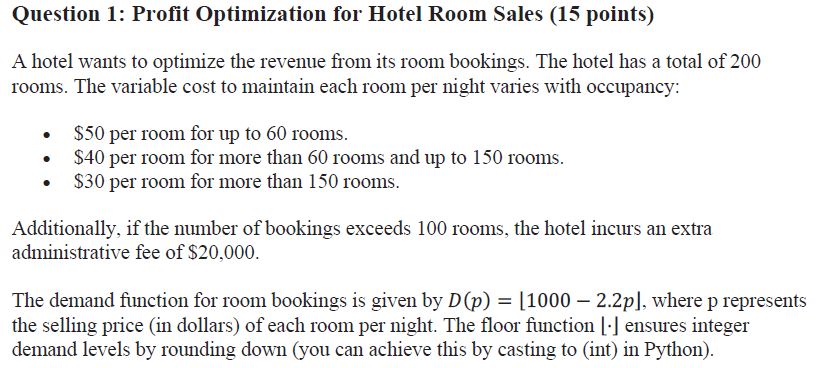

## a) Formulate the Expressions and Implement in Python

### 1. Demand Function

In [1]:
def demand(p):
    return max(int(1000 - 2.2 * p), 0)

### 2. Revenue Function

In [2]:
def revenue(p):
    return demand(p) * p

### 3. Total Cost Function

In [3]:
def total_cost(booked_rooms):
   
    if booked_rooms <= 60:
        cost = 50 * booked_rooms
    elif booked_rooms <= 150:
        cost = 40 * (booked_rooms - 60) + 50 * 60
    else: 
        cost = 30 * (booked_rooms - 150) + 40 * 90 + 50 * 60
    
    print(f"Cost before admin fee: {cost}")

    if booked_rooms > 100:
        cost += 20_000
        print(f"Admin fee applied. \nTotal cost after fee: {cost}")
    else:
        print(f"No admin fee applied. \nTotal cost remains: {cost}")
        
    return cost

## b) Profit Calculation

In [4]:
def profit(p):
    return revenue(p) - total_cost(p)

## Test

In [5]:
cost = 0
test_cases_rooms = [1, 60, 61, 100, 101, 150, 151]

    
for rooms in test_cases_rooms:
    print(f"Number of rooms: {rooms}")
    print(f"Demand: {demand(rooms)}")
    total_cost_value = total_cost(rooms)
    print("--------------------")

Number of rooms: 1
Demand: 997
Cost before admin fee: 50
No admin fee applied. 
Total cost remains: 50
--------------------
Number of rooms: 60
Demand: 868
Cost before admin fee: 3000
No admin fee applied. 
Total cost remains: 3000
--------------------
Number of rooms: 61
Demand: 865
Cost before admin fee: 3040
No admin fee applied. 
Total cost remains: 3040
--------------------
Number of rooms: 100
Demand: 780
Cost before admin fee: 4600
No admin fee applied. 
Total cost remains: 4600
--------------------
Number of rooms: 101
Demand: 777
Cost before admin fee: 4640
Admin fee applied. 
Total cost after fee: 24640
--------------------
Number of rooms: 150
Demand: 670
Cost before admin fee: 6600
Admin fee applied. 
Total cost after fee: 26600
--------------------
Number of rooms: 151
Demand: 667
Cost before admin fee: 6630
Admin fee applied. 
Total cost after fee: 26630
--------------------


# Question 2: Hotel Reservation Management

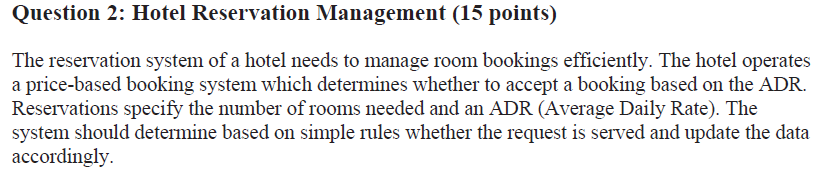

### Test Data

In [34]:
from pprint import pprint as pp

In [35]:
hotel_data = {
    'rooms_available':  10,       
    'adr_threshold':    150,
    'bookings':         []        
}

reservations = [
    {'id': '001', 'rooms': 2, 'adr': 160},
    {'id': '002', 'rooms': 4, 'adr': 140},
    {'id': '003', 'rooms': 3, 'adr': 155},
    {'id': '004', 'rooms': 5, 'adr': 200},
    {'id': '005', 'rooms': 1, 'adr': 160},
    {'id': '005', 'rooms': 100, 'adr': 160},
    
]

## a) Single Reservation Handling

In [36]:
def process_reservation(hotel, reservation):
    if reservation['adr'] >= hotel['adr_threshold'] and reservation['rooms'] <= hotel['rooms_available']:
        hotel['rooms_available'] -= reservation['rooms']
        hotel['bookings'].append(reservation)
        return hotel, True  
    return hotel, False

In [37]:
for reservation in reservations[:6]:
    hotel_data = {'rooms_available': 10, 'adr_threshold': 150, 'bookings': []}
    
    print(f"Processing reservation: {reservation}")
    updated_hotel_data, status = process_reservation(hotel_data, reservation)

    if status:
        print("   Booking accepted!")
    else:
        print("  Booking rejected!")

    print(f"    Updated hotel data: {updated_hotel_data}")
    print("--------------------")

Processing reservation: {'id': '001', 'rooms': 2, 'adr': 160}
   Booking accepted!
    Updated hotel data: {'rooms_available': 8, 'adr_threshold': 150, 'bookings': [{'id': '001', 'rooms': 2, 'adr': 160}]}
--------------------
Processing reservation: {'id': '002', 'rooms': 4, 'adr': 140}
  Booking rejected!
    Updated hotel data: {'rooms_available': 10, 'adr_threshold': 150, 'bookings': []}
--------------------
Processing reservation: {'id': '003', 'rooms': 3, 'adr': 155}
   Booking accepted!
    Updated hotel data: {'rooms_available': 7, 'adr_threshold': 150, 'bookings': [{'id': '003', 'rooms': 3, 'adr': 155}]}
--------------------
Processing reservation: {'id': '004', 'rooms': 5, 'adr': 200}
   Booking accepted!
    Updated hotel data: {'rooms_available': 5, 'adr_threshold': 150, 'bookings': [{'id': '004', 'rooms': 5, 'adr': 200}]}
--------------------
Processing reservation: {'id': '005', 'rooms': 1, 'adr': 160}
   Booking accepted!
    Updated hotel data: {'rooms_available': 9, 'ad

## b) Multi Reservation Handling

In [38]:
def process_reservations(hotel, reservations):
    accepted_reservations = []
    rejected_reservations = []
    
    for reservation in reservations:
        updated_hotel_data, status = process_reservation(hotel, reservation)
        if status:
            accepted_reservations.append(reservation)
        else:
            rejected_reservations.append(reservation)
        hotel = updated_hotel_data
    
    return hotel, accepted_reservations, rejected_reservations

In [44]:
hotel_data = {
    'rooms_available':  10,       
    'adr_threshold':    150,
    'bookings':         []        
}

updated_hotel_data, accepted_reservations, rejected_reservations = process_reservations(hotel_data, reservations)

print("Accepted Reservations:")
for reservation in accepted_reservations:
    print(f"   {reservation}")

print("--------------------")
print("Rejected Reservations:")
for reservation in rejected_reservations:
    print(f"   {reservation}")

print("--------------------")
print("Updated Hotel Data:")
pp(updated_hotel_data)

Accepted Reservations:
   {'id': '001', 'rooms': 2, 'adr': 160}
   {'id': '003', 'rooms': 3, 'adr': 155}
   {'id': '004', 'rooms': 5, 'adr': 200}
--------------------
Rejected Reservations:
   {'id': '002', 'rooms': 4, 'adr': 140}
   {'id': '005', 'rooms': 1, 'adr': 160}
   {'id': '005', 'rooms': 100, 'adr': 160}
--------------------
Updated Hotel Data:
{'adr_threshold': 150,
 'bookings': [{'adr': 160, 'id': '001', 'rooms': 2},
              {'adr': 155, 'id': '003', 'rooms': 3},
              {'adr': 200, 'id': '004', 'rooms': 5}],
 'rooms_available': 0}


# Question 3

In [47]:
import pandas as pd
pd.set_option('display.max_columns', None)

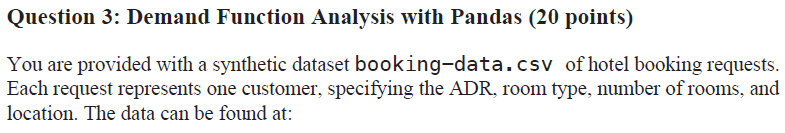

The dataset is provided in the `data.csv` file.

In [69]:
data_file = r"data.csv"

In [70]:
df = pd.read_csv(data_file)
df

,date,adr,room_type,num_rooms,location,month
0,2023-01-01,157,single,3,Copenhagen,1
1,2023-01-01,474,suite,1,Copenhagen,1
2,2023-01-01,442,suite,1,New York,1
3,2023-01-01,141,single,3,Copenhagen,1
4,2023-01-01,200,single,3,New York,1
...,...,...,...,...,...,...
7295,2023-12-31,137,single,4,New York,12
7296,2023-12-31,183,single,4,New York,12
7297,2023-12-31,208,single,5,New York,12
7298,2023-12-31,230,double,4,Copenhagen,12


## Descriptive Statistics and EDA

### Duplicates

In [71]:
df.duplicated().value_counts()

False    7285
True       15
Name: count, dtype: int64

In [72]:
df.drop_duplicates(inplace=True)

### Cols and types

In [73]:
df['date'] = pd.to_datetime(df['date'])

In [74]:
df.dtypes

date         datetime64[ns]
adr                   int64
room_type            object
num_rooms             int64
location             object
month                 int64
dtype: object

### Value Counts

In [75]:
df['room_type'].value_counts()

room_type
single    3585
double    2413
suite     1287
Name: count, dtype: int64

In [76]:
df['num_rooms'].value_counts()

num_rooms
2    1491
4    1482
1    1457
5    1449
3    1406
Name: count, dtype: int64

In [77]:
df['location'].value_counts()

location
New York      3607
Copenhagen    2182
Berlin        1496
Name: count, dtype: int64

In [78]:
df['month'].value_counts()

month
8     620
12    620
1     618
3     618
5     618
7     618
10    618
4     599
6     599
9     599
11    598
2     560
Name: count, dtype: int64

### Descriptive

In [79]:
df.describe()

,date,adr,num_rooms,month
count,7285,7285.000000,7285.000000,7285.000000
mean,2023-07-02 00:26:29.238160640,241.067536,2.996568,6.526699
min,2023-01-01 00:00:00,44.000000,1.000000,1.000000
25%,2023-04-02 00:00:00,149.000000,2.000000,4.000000
50%,2023-07-02 00:00:00,223.000000,3.000000,7.000000
75%,2023-10-01 00:00:00,311.000000,4.000000,10.000000
max,2023-12-31 00:00:00,716.000000,5.000000,12.000000
std,NaN,119.875514,1.415616,3.448293


In [153]:
df.isna().sum()

date         0
adr          0
room_type    0
num_rooms    0
location     0
month        0
dtype: int64

### Plots

In [82]:
try: 
    import hvplot
    import hvplot.pandas
except ModuleNotFoundError:
    %pip install hvplot
    import hvplot
    import hvplot.pandas

In [97]:
df.hvplot.scatter(x='date', y='adr', title='Average Daily Rate Over Time', alpha=0.5)

:Scatter   [date]   (adr)

In [101]:
df.hvplot.scatter(x='date', y='adr', by='room_type', title='ADR Over Time by Room Type', alpha=0.5)

:NdOverlay   [room_type]
   :Scatter   [date]   (adr)

In [98]:
df.hvplot.scatter(x='date', y='num_rooms', title='Total Rooms Booked Over Time')

:Scatter   [date]   (num_rooms)

In [150]:
df.hvplot.scatter(x='date', y='num_rooms', by='room_type', title='Total Rooms Booked Over Time', alpha=0.75)

:NdOverlay   [room_type]
   :Scatter   [date]   (num_rooms)

line plots looked weird as well, is this due to the data being synthetic?

In [110]:
df.hvplot.bar(x='room_type', y='adr', title='ADR Distribution by Room Type')

:Bars   [room_type]   (adr)

In [143]:
df.hvplot.bar(x='location', y='adr', title='ADR Distribution by Location')

:Bars   [location]   (adr)

In [120]:
df['month'] = df['date'].dt.to_period('M')
df.hvplot.bar(x='month', y='adr', title='Monthly ADR Trends')

:Bars   [month]   (adr)

### Grouped

In [135]:
df.hvplot.bar(x='room_type', y='adr', by='location', title='ADR Distribution by Room Type per Location', rot=45)

:Bars   [room_type,location]   (adr)

In [141]:
df.hvplot.bar(x='location', y='adr', by='room_type', title='ADR Distribution by Location per Room Type')

:Bars   [location,room_type]   (adr)

In [129]:
df.hvplot.bar(x='month', y='adr',by='room_type', title='Monthly ADR Trends', rot=90)

:Bars   [month,room_type]   (adr)

In [130]:
location_grouped = df.groupby('location').agg({
    'adr': ['mean', 'median', 'std', 'min', 'max', 'sum'],
    'num_rooms': ['count']
}).reset_index()

location_grouped

location         adr                                       num_rooms
                     mean median         std  min  max      sum     count
0      Berlin  133.969251  115.0   75.154675   44  458   200418      1496
1  Copenhagen  218.382676  192.0  103.541585   76  619   476511      2182
2    New York  299.209315  280.0  108.397300  122  716  1079248      3607

In [131]:
room_type_grouped = df.groupby('room_type').agg({
    'adr': ['mean', 'median', 'std', 'min', 'max', 'sum'],
    'num_rooms': ['count']
}).reset_index()

room_type_grouped

room_type         adr                                      num_rooms
                   mean median         std  min  max     sum     count
0    double  264.938251  256.0   83.169027   87  479  639296      2413
1    single  166.411158  156.0   68.687248   44  356  596584      3585
2     suite  404.271173  388.0  109.583448  173  716  520297      1287

In [132]:
location_room_type_grouped = df.groupby(['location', 'room_type']).agg({
    'adr': ['mean', 'median', 'std', 'min', 'max', 'sum'],
    'num_rooms': ['count']
}).reset_index()

location_room_type_grouped

location room_type         adr                                       \
                               mean median         std  min  max     sum   
0      Berlin    double  169.601449  168.0   46.712123   87  282   46810   
1      Berlin    single  100.355805  100.5   31.592811   44  172  107180   
2      Berlin     suite  305.447368  299.0   70.589832  173  458   46428   
3  Copenhagen    double  222.218208  215.0   59.405229  115  374  153775   
4  Copenhagen    single  152.498120  146.0   39.622964   76  246  162258   
5  Copenhagen     suite  376.708920  371.5   96.617985  202  619  160478   
6    New York    double  303.606228  296.0   73.086651  161  479  438711   
7    New York    single  225.152099  222.0   54.391661  122  356  327146   
8    New York     suite  442.018336  428.0  105.664876  244  716  313391   

  num_rooms  
      count  
0       276  
1      1068  
2       152  
3       692  
4      1064  
5       426  
6      1445  
7      1453  
8       709

## Demand Fn Analysis and Plotting

In [136]:
def demand_function(df, location, room_type, adr_value):
    filtered_df = df[(df['location'] == location) & 
                     (df['room_type'] == room_type) & 
                     (df['adr'] >= adr_value)]
    
    total_rooms = filtered_df['num_rooms'].sum()
    return total_rooms

In [137]:
adr_values = range(50, 600, 10)

demand_data = []

for location in df['location'].unique():
    for room_type in df['room_type'].unique():
        for adr in adr_values:
            total_rooms = demand_function(df, location, room_type, adr)
            demand_data.append({
                'location': location,
                'room_type': room_type,
                'adr': adr,
                'demand': total_rooms
            })

demand_df = pd.DataFrame(demand_data)
demand_df

,location,room_type,adr,demand
0,Copenhagen,single,50,3190
1,Copenhagen,single,60,3190
2,Copenhagen,single,70,3190
3,Copenhagen,single,80,3164
4,Copenhagen,single,90,3091
...,...,...,...,...
490,Berlin,double,550,0
491,Berlin,double,560,0
492,Berlin,double,570,0
493,Berlin,double,580,0


In [138]:
demand_df.hvplot.line(x='adr', y='demand', by=['location', 'room_type'], 
                      title='Demand Function D(p) as a Function of ADR')

:NdOverlay   [location,room_type]
   :Curve   [adr]   (demand)

## noitcelfeR

It can be seen that it is a generated dataset as some of the graphs.

The data is mostly clean and doesnt contain any `missing values`, however there are a few `duplicates`, which might have happened during syntetic data generation.

In the real world the data at the source wouldnt be this clean and precise, there could be missing values, and inconsistent data types in columns, such as strings mixed with numbers or incorrect date formats, wihch can lead to errors in analysis. 
Cleaning and pre-processing can therofre be a time-consuming process.

Missing values could be dropped, imputed on differnet specifications like ffill or using `sklearn.imputer` to predict missing values based on existing data.

Data sometimes also might need to be `scaled` / `normalised` to ensure that all features contribute to the model equally, preventing higher representation features to take over the decisions of the model.

# Question 4

The code for this question is not meant to be run and is therefore only included as an image.

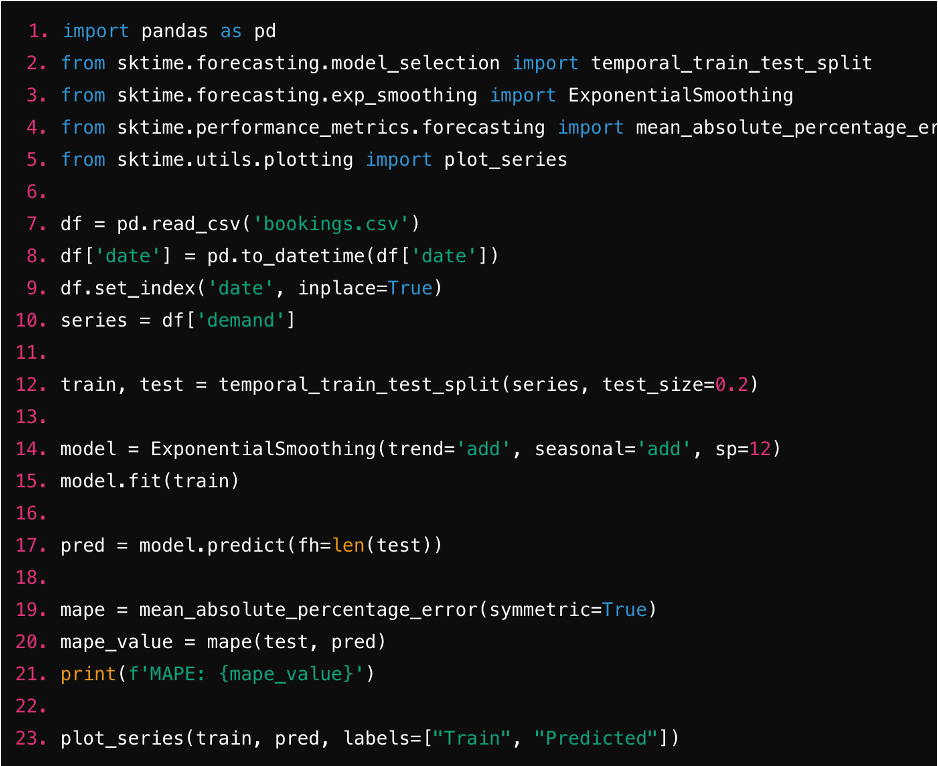

## a)

**Line 9**
```python
df.set_index('date', inplace=True)
```
Sets the date column as the index of the df to ensure operations are aligned by date. Using inplace=True modifies the original DataFrame without needing to reassign it.


**Line 12**
```python
train, test = temporal_train_test_split(series, test_size=0.2)
```
Splits the time series into training and test sets using temporal_train_test_split.
- **Training set**: Portion of the data to train the model
- **Test set**: Remainder to evaluate model's performance.
- 80/20


**Line 14**
```python
model = ExponentialSmoothing(trend='add', seasonal='add', sp=12)
```
Instantiates an ExponentialSmoothing model with additive trend and seasonality (sp=12).
- **Exp Smoothing**: Time series forcasting that appllies exponentialy decreasoing weights the further an observation is in the past, giving more importance to more recent data.
- **seasonality**: seaosnal period defined as 12 months? for a yearly seasonality?


**Line 15**
```python
model.fit(train)
```
Fits the ExponentialSmoothing model to the training data.


**Line 17**
```python
pred = model.predict(fh=len(test))
```
Generates predictions for the test period using the fitted model.
- **fh**: Forecasting horizon specifies the number of how many future periods to predict, in this case it should be equal to the count of test data points.

**Lines 19,20**
```python
mape = mean_absolute_percentage_error(symmetric=True)
mape_value = mape(test, pred)
```
Calculates the Mean Absolute Percentage Error (MAPE) between test and predicted data.
- **MAPE**: meassures accuracy of forecast as a percentage. Average of absolute differences between actual and predicted values, all divided by the number of actual values.

**Line 23**
```python
plot_series(train, pred, labels=["Train", "Predicted"])
```
Plots the training data and predicted values using plot_series.

## b)

**Exp Smoothing Model**
- only uses past data to predict future demand
- looks at the patterns and trends like seasonality but can't understand the reasons behind them (so no outside factors were considered in training the model)
- it might miss important demand changes caused by holidays or other events
  - which could lead to less accurate predictions
- For better predictions a model that can handle these external factors should be considered

## c)

**Alternative Approach:**
- Use a machine learning model that can handle multiple inputs, like **Random Forest** or **XGBoost**
  - can take into account both past demand data and external factors like `holiday_flag` and `special_events`
- Relevant Python packages: `scikit-learn` for Random Forest, `xgboost` for XGBoost
- Algorithm: Use a **regression model** where the target is the demand and the inputs (features) include:
  - Past demand data (time series features).
  - External factors like `holiday_flag` and `special_events`.

**Feature Engineering:**
- **Create lag features**: Include past demand values from previous days/weeks as features to capture trends.
- **Encode categorical features**: Convert `holiday_flag` and `special_events` into numerical format using one-hot encoding.
- **Time features**: Add features like day of the week, month, or special seasons to help the model learn patterns related to time.

# Question 5

In [160]:
try:
  from pulp import *
except:
  !pip install pulp
  from pulp import *

import numpy as np


# Example data
treatments =              ['Basic Massage', 'Aromatherapy', 'Deep Tissue Massage']
price_range =             np.arange(10, 101, 10)  # Pricing levels
a_values =                {'Basic Massage': 1500,   'Aromatherapy': 2000, 'Deep Tissue Massage': 1600}
b_values =                {'Basic Massage': 1.5,    'Aromatherapy': 1.2,  'Deep Tissue Massage': 1.3}
resource_usage_per_unit = {'Basic Massage': 1,      'Aromatherapy': 2,    'Deep Tissue Massage': 3}
total_resource_capacity = 50 # Total resource capacity (e.g., hours available from specialists)

demand = {}
for treatment in treatments:
    demand[treatment] = {}
    for p in price_range:
        demand[treatment][p] = max(a_values[treatment] * p**(-b_values[treatment]), 0)

prob = LpProblem("Spa_Treatment_Profit_Maximization", LpMaximize)

price_vars = {}
for treatment in treatments:
  price_vars[treatment] = LpVariable.dicts(treatment+"price", price_range, cat='Binary')

prob += lpSum(price_vars[treatment][price] * demand[treatment][price] * price for treatment in treatments for price in price_range)

# Constraint Block 1
for treatment in treatments:
    prob += lpSum(price_vars[treatment][price] for price in price_range) == 1

# Constraint Block 2
prob += lpSum(price_vars[treatment][price] * demand[treatment][price] * resource_usage_per_unit[treatment]
                   for treatment in treatments for price in price_range) <= total_resource_capacity

# Solve the problem
prob.solve(PULP_CBC_CMD(msg=False))


1

In [161]:
optimal_prices = {}
optimal_demand = {}
total_profit = prob.objective.value()

for treatment in treatments:
    for price in price_range:
        if price_vars[treatment][price].varValue == 1:
            optimal_prices[treatment] = price
            optimal_demand[treatment] = demand[treatment][price]
            break

print(f"Optimal Prices: {optimal_prices}")
print(f"Optimal Demand Levels: {optimal_demand}")
print(f"Total Profit: ${total_profit:.2f}")

Optimal Prices: {'Basic Massage': 20, 'Aromatherapy': 80, 'Deep Tissue Massage': 100}
Optimal Demand Levels: {'Basic Massage': 16.77050983124842, 'Aromatherapy': 10.406915092523416, 'Deep Tissue Massage': 4.019018290415327}
Total Profit: $1569.87


## a) Specify and Explain the Demand Functions

**Purpose**: Estimates how many people will choose each treatment at differnt price points
**Price levels considered**: 10 - 100, with the step of 10

```python
demand[treatment][p] = max(a_values[treatment] * p**(-b_values[treatment]), 0)
```
it cannot be used because it is not linear but uses a power-law, which is not linear 
- when the p is raised to a negative power there is a non-linear relationship between price and demand
- LP requires the obj function and constraints to be linear

## b) Explain the Optimization Logic

**Decision Variables**
- `price_vars`: Dictionary storing binary decision variables for each treatment and price level (1 if chosen else 0)

**Objective Function to Maximize Profit**
```python
prob += lpSum(price_vars[treatment][price] * demand[treatment][price] * price for treatment in treatments for price in price_range)
```
- it wants to optimize for maximal total profit, hence `price * demand` in all treatments at different price levels

**Constraints**
- Treatment:
  - Single - ensures only one price level is selected per treatment
```python
prob += lpSum(price_vars[treatment][price] for price in price_range) == 1
```
- Capacity:
  - Limits the total resource usage to not exceed the available capacity
```python
prob += lpSum(price_vars[treatment][price] * demand[treatment][price] * resource_usage_per_unit[treatment] for treatment in treatments for price in price_range) <= total_resource_capacity
```

## c) Determine Optiomal Prices and Profits

Copy pasting most of the code from above after changing the codition

In [162]:
total_resource_capacity = 30 # Total resource capacity (e.g., hours available from specialists)

demand = {}
for treatment in treatments:
    demand[treatment] = {}
    for p in price_range:
        demand[treatment][p] = max(a_values[treatment] * p**(-b_values[treatment]), 0)

prob = LpProblem("Spa_Treatment_Profit_Maximization", LpMaximize)

price_vars = {}
for treatment in treatments:
  price_vars[treatment] = LpVariable.dicts(treatment+"price", price_range, cat='Binary')

prob += lpSum(price_vars[treatment][price] * demand[treatment][price] * price for treatment in treatments for price in price_range)

# Constraint Block 1
for treatment in treatments:
    prob += lpSum(price_vars[treatment][price] for price in price_range) == 1

# Constraint Block 2
prob += lpSum(price_vars[treatment][price] * demand[treatment][price] * resource_usage_per_unit[treatment]
                   for treatment in treatments for price in price_range) <= total_resource_capacity

# Solve the problem
prob.solve(PULP_CBC_CMD(msg=False))


1

In [167]:
optimal_prices = {}
optimal_demand = {}
total_profit = prob.objective.value()

for treatment in treatments:
    for price in price_range:
        if price_vars[treatment][price].varValue == 1:
            optimal_prices[treatment] = price
            optimal_demand[treatment] = demand[treatment][price]
            break

print(f"Optimal Prices:")
pp(optimal_prices)
print(f"Optimal Demand Levels:")
pp(optimal_demand)
print(f"Total Profit: ${total_profit:.2f}")

Optimal Prices:
{'Aromatherapy': 100, 'Basic Massage': 90, 'Deep Tissue Massage': 100}
Optimal Demand Levels:
{'Aromatherapy': 7.962143411069947,
 'Basic Massage': 1.7568209223157665,
 'Deep Tissue Massage': 4.019018290415327}
Total Profit: $1356.23


## d) Resource Capacity Sensitivity Analysis

Wrapping the previously copy pasted code from above into a for loop based on specified constraints with step of 10

In [168]:
results = []

for total_resource_capacity in range(20, 101, 10):
    demand = {}
    for treatment in treatments:
        demand[treatment] = {}
        for p in price_range:
            demand[treatment][p] = max(a_values[treatment] * p**(-b_values[treatment]), 0)

    prob = LpProblem("Spa_Treatment_Profit_Maximization", LpMaximize)

    price_vars = {}
    for treatment in treatments:
        price_vars[treatment] = LpVariable.dicts(treatment+"price", price_range, cat='Binary')

    prob += lpSum(price_vars[treatment][price] * demand[treatment][price] * price for treatment in treatments for price in price_range)

    for treatment in treatments:
        prob += lpSum(price_vars[treatment][price] for price in price_range) == 1

    prob += lpSum(price_vars[treatment][price] * demand[treatment][price] * resource_usage_per_unit[treatment]
                       for treatment in treatments for price in price_range) <= total_resource_capacity

    prob.solve(PULP_CBC_CMD(msg=False))

    result = {'Resource Capacity': total_resource_capacity, 'Total Profit': prob.objective.value()}
    for treatment in treatments:
        for price in price_range:
            if price_vars[treatment][price].varValue == 1:
                result[treatment + ' Demand'] = demand[treatment][price]
                break
    results.append(result)

df_results = pd.DataFrame(results)

In [169]:
df_results

,Resource Capacity,Total Profit,Basic Massage Demand,Deep Tissue Massage Demand,Aromatherapy Demand
0,20,874.049085,1.500000,4.019018,NaN
1,30,1356.230053,1.756821,4.019018,7.962143
2,40,1488.933381,9.128709,4.019018,9.035225
3,50,1569.865233,16.770510,4.019018,10.406915
4,60,1632.078504,16.770510,4.608979,14.697670
5,70,1685.732661,16.770510,7.807704,14.697670
6,80,1718.482559,16.770510,7.807704,18.292202
7,90,1760.224955,16.770510,7.807704,23.908812
8,100,1803.759854,47.434165,4.608979,18.292202


In [183]:
profit_plot = df_results.hvplot.line(x='Resource Capacity', y='Total Profit', title='Total Profit vs. Resource Capacity')

demand_plot = df_results.hvplot.line(x='Resource Capacity', y=[treatment + ' Demand' for treatment in treatments], 
                                     title='Demand Levels vs. Resource Capacity', 
                                     value_label='Demand Level', legend='top_left')

profit_plot + demand_plot

:Layout
   .Curve.I     :Curve   [Resource Capacity]   (Total Profit)
   .NdOverlay.I :NdOverlay   [Variable]
      :Curve   [Resource Capacity]   (Demand Level)

In [185]:
profit_plot = df_results.hvplot.line(x='Resource Capacity', y='Total Profit', title='Total Profit vs. Resource Capacity')

demand_plot = df_results.hvplot.line(x='Resource Capacity', y=[treatment + ' Demand' for treatment in treatments], 
                                     title='Demand Levels vs. Resource Capacity', 
                                     value_label='Demand Level', legend='top')

profit_plot * demand_plot

:Overlay
   .Curve.I     :Curve   [Resource Capacity]   (Total Profit)
   .NdOverlay.I :NdOverlay   [Variable]
      :Curve   [Resource Capacity]   (Demand Level)